In [1]:
# 데이터 불러오기
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

path = 'C:/Users/82109/Documents/sda_2023/'
food = pd.read_csv(path+'Food_Supply_kcal_Data.csv')
life = pd.read_csv(path+'healthy_lifestyle_city_2021.csv')

#food
#life

In [2]:
## food 전처리 ##
food['Undernourished'] = food['Undernourished'].map(lambda x: '1.0' if x == '<2.5' else x).astype('float64')
food = food.drop('Unit (all except Population)', axis=1)
food = food.dropna()

# 결측값 유무 확인
#food.isnull().sum()

# country 통일
food.loc[food['Country'] == 'United States of America', 'Country'] = 'United States'
food.loc[food['Country'] == 'Russian Federation', 'Country'] = 'Russia'
food.loc[food['Country'] == 'Korea, South', 'Country'] = 'South Korea'

In [3]:
## life 전처리 ##
col_name = {
    'City': 'Country',
    'Rank': 'Rank',
    'Sunshine hours(City)': 'Sunshine hours',
    'Cost of a bottle of water(City)': 'Cost of a bottle of water',
    'Obesity levels(Country)': 'Obesity levels',
    'Life expectancy(years) (Country)': 'Life expectancy(years)',
    'Pollution(Index score) (City)': 'Pollution(Index score)',
    'Annual avg. hours worked': 'Annual avg. hours worked',
    'Happiness levels(Country)': 'Happiness levels',
    'Outdoor activities(City)': 'Outdoor activities',
    'Number of take out places(City)': 'Number of take out places',
    'Cost of a monthly gym membership(City)': 'Cost of a monthly gym membership'
}
life.rename(columns=col_name, inplace=True)

# 결측치 정제 (결측치들 평균 값으로 대체)
life['Sunshine hours'] = life['Sunshine hours'].replace('-', pd.NA)
life['Sunshine hours'] = pd.to_numeric(life['Sunshine hours'], errors='coerce')
mean_Sunshine_hours = life['Sunshine hours'].mean()
life['Sunshine hours'].fillna(mean_Sunshine_hours, inplace=True)
#life['Sunshine hours']

life['Pollution(Index score)'] = life['Pollution(Index score)'].replace('-', pd.NA)
life['Pollution(Index score)'] = pd.to_numeric(life['Pollution(Index score)'], errors='coerce')
mean_Pollution = life['Pollution(Index score)'].mean()
life['Pollution(Index score)'].fillna(mean_Pollution, inplace=True)
#life['Pollution(Index score)']

life['Annual avg. hours worked'] = life['Annual avg. hours worked'].replace('-', pd.NA)
life['Annual avg. hours worked'] = pd.to_numeric(life['Annual avg. hours worked'], errors='coerce')
mean_worked = life['Annual avg. hours worked'].mean()
life['Annual avg. hours worked'].fillna(mean_worked, inplace=True)
#life['Annual avg. hours worked']

# 단위 기호 빼기
life['Obesity levels'] = life['Obesity levels'].astype(str)
life['Obesity levels'] = life['Obesity levels'].str.rstrip('%').astype('float')
#print(life['Obesity levels'])


life['Cost of a bottle of water'] = life['Cost of a bottle of water'].astype(str)
life['Cost of a bottle of water'] = life['Cost of a bottle of water'].str.replace('£', '').astype('float')
#print(life['Cost of a bottle of water'])

life['Cost of a monthly gym membership'] = life['Cost of a monthly gym membership'].astype(str)
life['Cost of a monthly gym membership'] = life['Cost of a monthly gym membership'].str.replace('£', '').astype('float')
#print(life['Cost of a monthly gym membership'])

# city -> country
country_mapping = {
    'Amsterdam': 'Netherlands',
    'Sydney': 'Australia',
    'Vienna': 'Austria',
    'Stockholm': 'Sweden',
    'Copenhagen': 'Denmark',
    'Helsinki': 'Finland',
    'Fukuoka': 'Japan',
    'Berlin': 'Germany',
    'Barcelona': 'Spain',
    'Vancouver': 'Canada',
    'Melbourne': 'Australia',
    'Beijing': 'China',
    'Bangkok': 'Thailand',
    'Buenos Aires': 'Argentina',
    'Toronto': 'Canada',
    'Madrid': 'Spain',
    'Jakarta': 'Indonesia',
    'Seoul': 'South Korea',
    'Frankfurt': 'Germany',
    'Geneva': 'Switzerland',
    'Tel Aviv': 'Israel',
    'Istanbul': 'Turkey',
    'Cairo': 'Egypt',
    'Taipei': 'Taiwan',
    'Los Angeles': 'United States',
    'Mumbai': 'India',
    'Boston': 'United States',
    'Dublin': 'Ireland',
    'Tokyo': 'Japan',
    'Chicago': 'United States',
    'Hong Kong': 'Hong Kong',
    'Shanghai': 'China',
    'Brussels': 'Belgium',
    'San Francisco': 'United States',
    'Paris': 'France',
    'Sao Paulo': 'Brazil',
    'Zurich': 'Switzerland',
    'London': 'United Kingdom',
    'Johannesburg': 'South Africa',
    'Milan': 'Italy',
    'Washington, D.C.': 'United States',
    'New York': 'United States',
    'Moscow': 'Russia',
    'Mexico City': 'Mexico'
}
life['Country'] = life['Country'].replace(country_mapping)

In [5]:
# 전처리한 food 확인하기
#food

In [29]:
# 전처리한 life 확인하기
#life

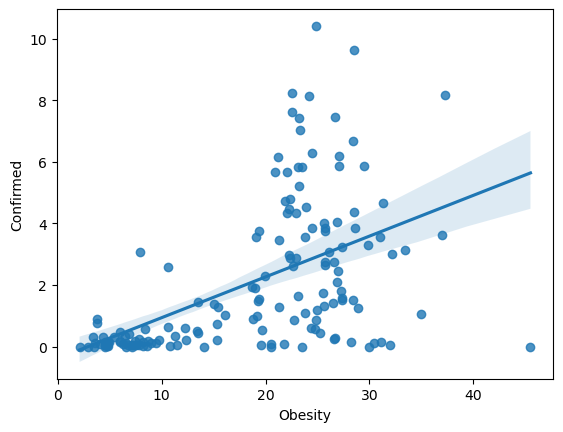

상관계수 : 0.5255    p-value : 0.00000000000260663659



In [30]:
# 3. covid-19 확진률과 비만율의 관계
import scipy.stats as stats
import seaborn as sns

# 상관관계 계산
correlation = food['Confirmed'].corr(food['Obesity'])

# 시각화
sns.regplot(x='Obesity', y='Confirmed', data=food)
plt.xlabel('Obesity')
plt.ylabel('Confirmed')
plt.show()

a,b = stats.pearsonr(food['Confirmed'].values, food['Obesity'].values)
print("상관계수 : {:.4f}    p-value : {:.20f}\n".format(a,b))

In [59]:
# 3. 코로나 확진률과 비만율의 상관관계 검정
from scipy.stats import shapiro, levene, spearmanr

a = food['Confirmed']
b = food['Obesity']

# 정규성 검정
stat_a, p_a = shapiro(a)
stat_b, p_b = shapiro(b)

print(f'정규성 검정 결과 (Confirmed): Statistic={stat_a:.4f}, p-value={p_a:.20f}')
print(f'정규성 검정 결과 (Obesity): Statistic={stat_b:.4f}, p-value={p_b:.20f}')

# 등분산성 검정
stat_levene, p_value_levene = levene(a, b)
print(f'등분산성 검정 결과: Statistic={stat_levene:.4f}, p-value={p_value_levene:.20f}')

# 스피어만 검정 (정규분포를 따르지 않고 등분산성을 가지지 않는 경우에 사용하는 비모수적인 방법)
correlation, p_value = spearmanr(a, b)
print(f'Spearman검정 -> 상관계수: {correlation:.4f}', f'p-value: {p_value:.20f}')

정규성 검정 결과 (Confirmed): Statistic=0.8204, p-value=0.00000000000179627016
정규성 검정 결과 (Obesity): Statistic=0.9333, p-value=0.00000127858925225155
등분산성 검정 결과: Statistic=160.8276, p-value=0.00000000000000000000
Spearman검정 -> 상관계수: 0.5723 p-value: 0.00000000000000897039


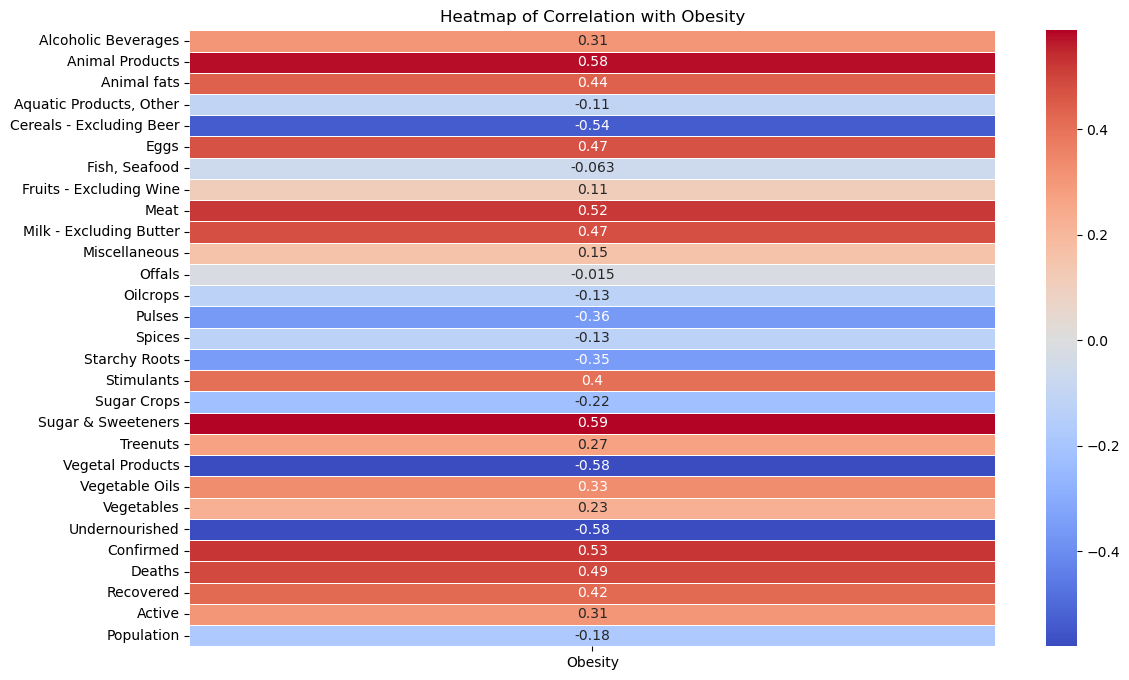

In [12]:
# 비만률과 음식들의 heatmap
import seaborn as sns
import matplotlib.pyplot as plt

food_ = food.drop('Country', axis=1)
obesity_corr = food_.corr()['Obesity'].drop('Obesity')

plt.figure(figsize=(13, 8))
sns.heatmap(obesity_corr.to_frame(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Correlation with Obesity')
plt.show()

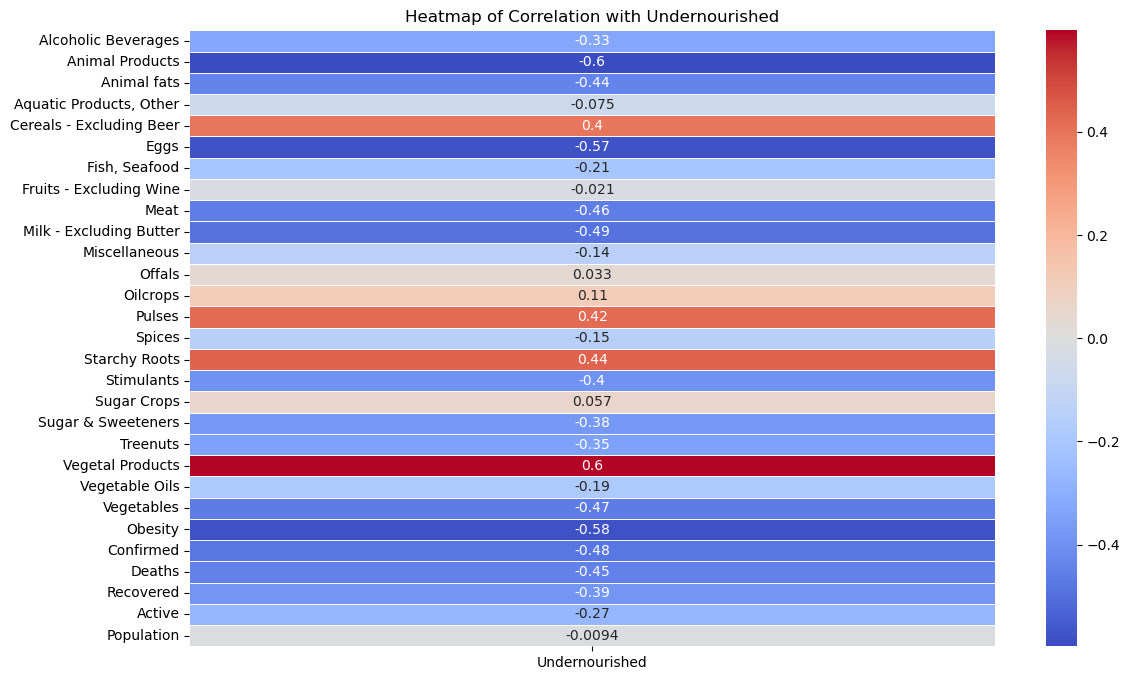

In [11]:
# 영양결핍률과 음식들의 heatmap

food_ = food.drop('Country', axis=1)
Undernourished_corr = food_.corr()['Undernourished'].drop('Undernourished')

plt.figure(figsize=(13, 8))
sns.heatmap(Undernourished_corr.to_frame(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Correlation with Undernourished')
plt.show()

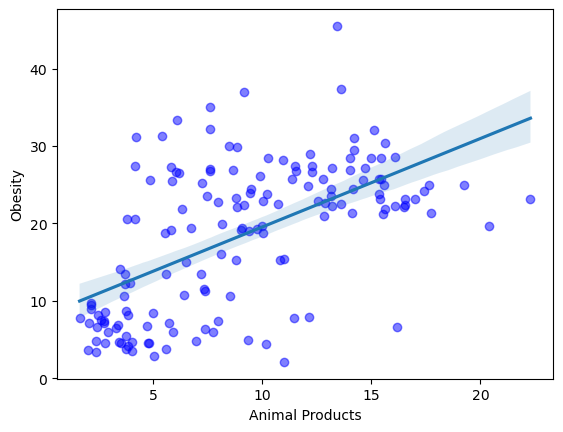

Column: Animal Products      Correlation: 0.5755    p-value: 0.00000000000000586432



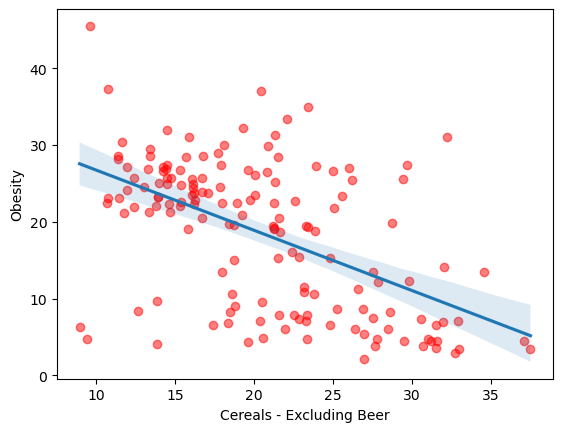

Column: Cereals - Excluding Beer Correlation: -0.5355    p-value: 0.00000000000083040689



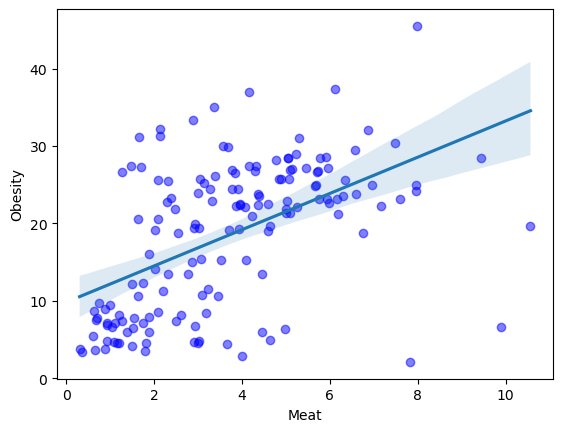

Column: Meat                 Correlation: 0.5199    p-value: 0.00000000000483773483



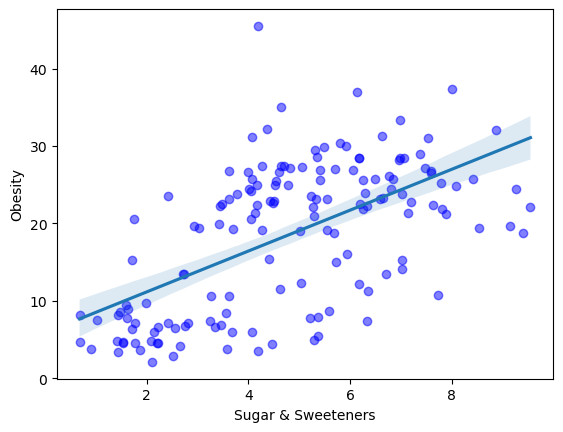

Column: Sugar & Sweeteners   Correlation: 0.5870    p-value: 0.00000000000000124015



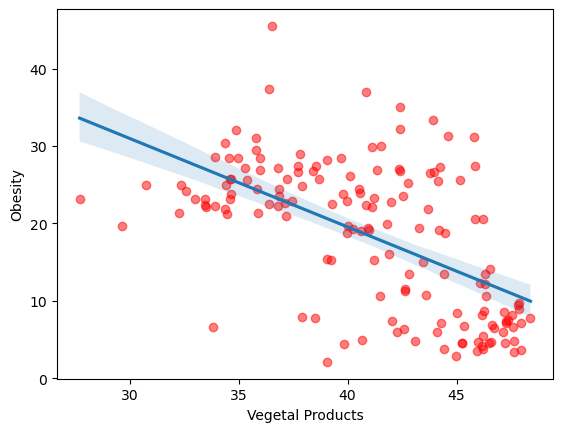

Column: Vegetal Products     Correlation: -0.5758    p-value: 0.00000000000000561524



In [27]:
# 4. 비만율과 섭취하는 음식 종류의 관계
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

def plot_correlation(data, x_col, y_col):
    correlation, p_value = stats.pearsonr(data[x_col].values, data[y_col].values)
    
    if abs(correlation) > 0.5:
        sns.regplot(x=data[x_col].values, y=data[y_col].values, scatter_kws={'alpha': 0.5, 'color': 'red' if correlation < 0 else 'blue'})
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.show()
        print(f"Column: {x_col:20s} Correlation: {correlation:.4f}    p-value: {p_value:.20f}\n")

cols = ['Alcoholic Beverages', 'Animal Products', 'Animal fats',
        'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs',
        'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat',
        'Milk - Excluding Butter', 'Miscellaneous', 'Offals', 'Oilcrops',
        'Pulses', 'Spices', 'Starchy Roots', 'Stimulants', 'Sugar Crops',
        'Sugar & Sweeteners', 'Treenuts', 'Vegetal Products', 'Vegetable Oils',
        'Vegetables']

for col in cols:
    plot_correlation(food, col, 'Obesity')

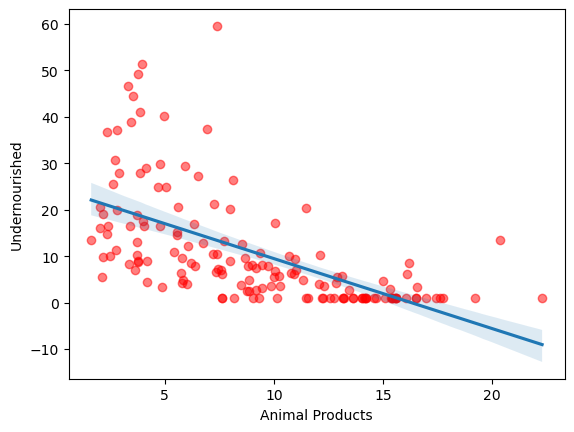

Column: Animal Products      Correlation: -0.5968    p-value: 0.00000000000000031309



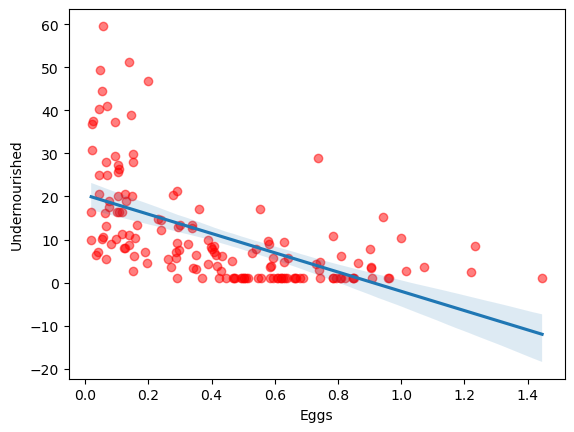

Column: Eggs                 Correlation: -0.5747    p-value: 0.00000000000000646619



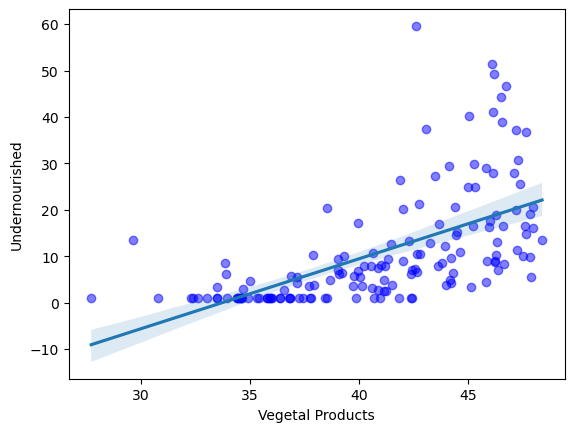

Column: Vegetal Products     Correlation: 0.5968    p-value: 0.00000000000000031369



In [26]:
6. # 영양결핍률과 섭취하는 음식 종류의 관계 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

def plot_correlation(data, x_col, y_col):
    correlation, p_value = stats.pearsonr(data[x_col].values, data[y_col].values)
    
    if abs(correlation) > 0.5:
        sns.regplot(x=data[x_col].values, y=data[y_col].values, scatter_kws={'alpha': 0.5, 'color': 'red' if correlation < 0 else 'blue'})
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.show()
        print(f"Column: {x_col:20s} Correlation: {correlation:.4f}    p-value: {p_value:.20f}\n")

cols = ['Alcoholic Beverages', 'Animal Products', 'Animal fats',
        'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs',
        'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat',
        'Milk - Excluding Butter', 'Miscellaneous', 'Offals', 'Oilcrops',
        'Pulses', 'Spices', 'Starchy Roots', 'Stimulants', 'Sugar Crops',
        'Sugar & Sweeteners', 'Treenuts', 'Vegetal Products', 'Vegetable Oils',
        'Vegetables']

for col in cols:
    plot_correlation(food, col, 'Undernourished')


In [49]:
# 통계적 유의성 확인
# 지금까지 피어슨 검정을 통해 상관계수와 p값을 구했는데 
# 피어슨은 정규분포 가정과 등분산성 가정을 만족하는 경우에 적절하게 사용되므로
# 아래와 같이 정규성검정, 등분산성 검정을 하고 그에 맞는 상관계수와 p값을 계산해보았다.
from scipy.stats import shapiro, levene, spearmanr

a = food['Obesity']
b = food['Animal Products']

# 정규성 검정
stat_a, p_a = shapiro(a)
stat_b, p_b = shapiro(b)

print(f'정규성 검정 결과 (Obesity): Statistic={stat_a:.4f}, p-value={p_a:.20f}')
print(f'정규성 검정 결과 (Animal Products): Statistic={stat_b:.4f}, p-value={p_b:.20f}')

# 등분산성 검정
stat_levene, p_value_levene = levene(a, b)
print(f'등분산성 검정 결과: Statistic={stat_levene:.4f}, p-value={p_value_levene:.20f}')

# 스피어만 검정 (정규분포를 따르지 않고 등분산성을 가지지 않는 경우에 사용하는 비모수적인 방법)
correlation, p_value = spearmanr(a, b)
print(f'Spearman검정 -> 상관계수: {correlation:.4f}', f'p-value: {p_value:.20f}')

정규성 검정 결과 (Obesity): Statistic=0.9333, p-value=0.00000127858925225155
정규성 검정 결과 (Animal Products): Statistic=0.9575, p-value=0.00011729457037290558
등분산성 검정 결과: Statistic=61.0055, p-value=0.00000000000009163023
Spearman검정 -> 상관계수: 0.5662 p-value: 0.00000000000001960834


In [50]:
from scipy.stats import shapiro, levene, spearmanr

a = food['Obesity']
b = food['Cereals - Excluding Beer']

# 정규성 검정
stat_a, p_a = shapiro(a)
stat_b, p_b = shapiro(b)

print(f'정규성 검정 결과 (Obesity): Statistic={stat_a:.4f}, p-value={p_a:.20f}')
print(f'정규성 검정 결과 (Cereals - Excluding Beer): Statistic={stat_b:.4f}, p-value={p_b:.20f}')

# 등분산성 검정
stat_levene, p_value_levene = levene(a, b)
print(f'등분산성 검정 결과: Statistic={stat_levene:.4f}, p-value={p_value_levene:.20f}')

# 스피어만 검정 (정규분포를 따르지 않고 등분산성을 가지지 않는 경우에 사용하는 비모수적인 방법)
correlation, p_value = spearmanr(a, b)
print(f'Spearman검정 -> 상관계수: {correlation:.4f}', f'p-value: {p_value:.20f}')

정규성 검정 결과 (Obesity): Statistic=0.9333, p-value=0.00000127858925225155
정규성 검정 결과 (Cereals - Excluding Beer): Statistic=0.9698, p-value=0.00183851050678640604
등분산성 검정 결과: Statistic=23.3997, p-value=0.00000208883449118085
Spearman검정 -> 상관계수: -0.5047 p-value: 0.00000000002496821733


In [51]:
from scipy.stats import shapiro, levene, spearmanr

a = food['Obesity']
b = food['Meat']

# 정규성 검정
stat_a, p_a = shapiro(a)
stat_b, p_b = shapiro(b)

print(f'정규성 검정 결과 (Obesity): Statistic={stat_a:.4f}, p-value={p_a:.20f}')
print(f'정규성 검정 결과 (Meat): Statistic={stat_b:.4f}, p-value={p_b:.20f}')

# 등분산성 검정
stat_levene, p_value_levene = levene(a, b)
print(f'등분산성 검정 결과: Statistic={stat_levene:.4f}, p-value={p_value_levene:.20f}')

# 스피어만 검정 (정규분포를 따르지 않고 등분산성을 가지지 않는 경우에 사용하는 비모수적인 방법)
correlation, p_value = spearmanr(a, b)
print(f'Spearman검정 -> 상관계수: {correlation:.4f}', f'p-value: {p_value:.20f}')

정규성 검정 결과 (Obesity): Statistic=0.9333, p-value=0.00000127858925225155
정규성 검정 결과 (Meat): Statistic=0.9627, p-value=0.00035980451502837241
등분산성 검정 결과: Statistic=174.6879, p-value=0.00000000000000000000
Spearman검정 -> 상관계수: 0.5409 p-value: 0.00000000000044316741


In [52]:
from scipy.stats import shapiro, levene, spearmanr

a = food['Obesity']
b = food['Sugar & Sweeteners']

# 정규성 검정
stat_a, p_a = shapiro(a)
stat_b, p_b = shapiro(b)

print(f'정규성 검정 결과 (Obesity): Statistic={stat_a:.4f}, p-value={p_a:.20f}')
print(f'정규성 검정 결과 (Sugar & Sweeteners): Statistic={stat_b:.4f}, p-value={p_b:.20f}')

# 등분산성 검정
stat_levene, p_value_levene = levene(a, b)
print(f'등분산성 검정 결과: Statistic={stat_levene:.4f}, p-value={p_value_levene:.20f}')

# 스피어만 검정 (정규분포를 따르지 않고 등분산성을 가지지 않는 경우에 사용하는 비모수적인 방법)
correlation, p_value = spearmanr(a, b)
print(f'Spearman검정 -> 상관계수: {correlation:.4f}', f'p-value: {p_value:.20f}')

정규성 검정 결과 (Obesity): Statistic=0.9333, p-value=0.00000127858925225155
정규성 검정 결과 (Sugar & Sweeteners): Statistic=0.9816, p-value=0.03807317465543746948
등분산성 검정 결과: Statistic=173.3899, p-value=0.00000000000000000000
Spearman검정 -> 상관계수: 0.5751 p-value: 0.00000000000000619435


In [53]:
from scipy.stats import shapiro, levene, spearmanr

a = food['Obesity']
b = food['Vegetal Products']

# 정규성 검정
stat_a, p_a = shapiro(a)
stat_b, p_b = shapiro(b)

print(f'정규성 검정 결과 (Obesity): Statistic={stat_a:.4f}, p-value={p_a:.20f}')
print(f'정규성 검정 결과 (Vegetal Products): Statistic={stat_b:.4f}, p-value={p_b:.20f}')

# 등분산성 검정
stat_levene, p_value_levene = levene(a, b)
print(f'등분산성 검정 결과: Statistic={stat_levene:.4f}, p-value={p_value_levene:.20f}')

# 스피어만 검정 (정규분포를 따르지 않고 등분산성을 가지지 않는 경우에 사용하는 비모수적인 방법)
correlation, p_value = spearmanr(a, b)
print(f'Spearman검정 -> 상관계수: {correlation:.4f}', f'p-value: {p_value:.20f}')

정규성 검정 결과 (Obesity): Statistic=0.9333, p-value=0.00000127858925225155
정규성 검정 결과 (Vegetal Products): Statistic=0.9575, p-value=0.00011614019604166970
등분산성 검정 결과: Statistic=61.0187, p-value=0.00000000000009112235
Spearman검정 -> 상관계수: -0.5660 p-value: 0.00000000000002027253


In [54]:
from scipy.stats import shapiro, levene, spearmanr

a = food['Undernourished']
b = food['Animal Products']

# 정규성 검정
stat_a, p_a = shapiro(a)
stat_b, p_b = shapiro(b)

print(f'정규성 검정 결과 (Undernourished): Statistic={stat_a:.4f}, p-value={p_a:.20f}')
print(f'정규성 검정 결과 (Animal Products): Statistic={stat_b:.4f}, p-value={p_b:.20f}')

# 등분산성 검정
stat_levene, p_value_levene = levene(a, b)
print(f'등분산성 검정 결과: Statistic={stat_levene:.4f}, p-value={p_value_levene:.20f}')

# 스피어만 검정 (정규분포를 따르지 않고 등분산성을 가지지 않는 경우에 사용하는 비모수적인 방법)
correlation, p_value = spearmanr(a, b)
print(f'Spearman검정 -> 상관계수: {correlation:.4f}', f'p-value: {p_value:.20f}')

정규성 검정 결과 (Undernourished): Statistic=0.7893, p-value=0.00000000000012983348
정규성 검정 결과 (Animal Products): Statistic=0.9575, p-value=0.00011729457037290558
등분산성 검정 결과: Statistic=28.2978, p-value=0.00000020126087067646
Spearman검정 -> 상관계수: -0.7538 p-value: 0.00000000000000000000


In [56]:
from scipy.stats import shapiro, levene, spearmanr

a = food['Undernourished']
b = food['Eggs']

# 정규성 검정
stat_a, p_a = shapiro(a)
stat_b, p_b = shapiro(b)

print(f'정규성 검정 결과 (Undernourished): Statistic={stat_a:.4f}, p-value={p_a:.20f}')
print(f'정규성 검정 결과 (Eggs): Statistic={stat_b:.4f}, p-value={p_b:.20f}')

# 등분산성 검정
stat_levene, p_value_levene = levene(a, b)
print(f'등분산성 검정 결과: Statistic={stat_levene:.4f}, p-value={p_value_levene:.20f}')

# 스피어만 검정 (정규분포를 따르지 않고 등분산성을 가지지 않는 경우에 사용하는 비모수적인 방법)
correlation, p_value = spearmanr(a, b)
print(f'Spearman검정 -> 상관계수: {correlation:.4f}', f'p-value: {p_value:.20f}')

정규성 검정 결과 (Undernourished): Statistic=0.7893, p-value=0.00000000000012983348
정규성 검정 결과 (Eggs): Statistic=0.9366, p-value=0.00000222735798161011
등분산성 검정 결과: Statistic=108.1912, p-value=0.00000000000000000000
Spearman검정 -> 상관계수: -0.7013 p-value: 0.00000000000000000000


In [57]:
from scipy.stats import shapiro, levene, spearmanr

a = food['Undernourished']
b = food['Vegetal Products']

# 정규성 검정
stat_a, p_a = shapiro(a)
stat_b, p_b = shapiro(b)

print(f'정규성 검정 결과 (Undernourished): Statistic={stat_a:.4f}, p-value={p_a:.20f}')
print(f'정규성 검정 결과 (Vegetal Products): Statistic={stat_b:.4f}, p-value={p_b:.20f}')

# 등분산성 검정
stat_levene, p_value_levene = levene(a, b)
print(f'등분산성 검정 결과: Statistic={stat_levene:.4f}, p-value={p_value_levene:.20f}')

# 스피어만 검정 (정규분포를 따르지 않고 등분산성을 가지지 않는 경우에 사용하는 비모수적인 방법)
correlation, p_value = spearmanr(a, b)
print(f'Spearman검정 -> 상관계수: {correlation:.4f}', f'p-value: {p_value:.20f}')

정규성 검정 결과 (Undernourished): Statistic=0.7893, p-value=0.00000000000012983348
정규성 검정 결과 (Vegetal Products): Statistic=0.9575, p-value=0.00011614019604166970
등분산성 검정 결과: Statistic=28.3046, p-value=0.00000020061844594903
Spearman검정 -> 상관계수: 0.7533 p-value: 0.00000000000000000000
